In [1]:
import zipfile
import os
import glob 
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muahammadrionandod","key":"d0c9f1dfec82f6af90fcc9cc62f00bc5"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d moltean/fruits

 99% 1.27G/1.28G [00:08<00:00, 147MB/s]
100% 1.28G/1.28G [00:08<00:00, 154MB/s]


In [6]:
!mkdir fruits
!unzip -qq fruits.zip -d fruits
!ls fruits

fruits-360_dataset  fruits-360-original-size


In [7]:
import os

fruits = os.path.join('/content/fruits/fruits-360_dataset/fruits-360/Training')

print(os.listdir(fruits))

['Apple Granny Smith', 'Quince', 'Carambula', 'Pear Red', 'Tamarillo', 'Pineapple Mini', 'Plum 3', 'Granadilla', 'Strawberry Wedge', 'Raspberry', 'Grape Blue', 'Apricot', 'Cherry Wax Red', 'Grape White 4', 'Huckleberry', 'Tomato not Ripened', 'Apple Pink Lady', 'Onion Red', 'Grape White 2', 'Pear Forelle', 'Walnut', 'Nectarine Flat', 'Avocado', 'Banana Red', 'Cherry 1', 'Lemon', 'Kohlrabi', 'Apple Red Yellow 2', 'Apple Crimson Snow', 'Tomato Yellow', 'Strawberry', 'Peach Flat', 'Guava', 'Cocos', 'Pomelo Sweetie', 'Kaki', 'Ginger Root', 'Maracuja', 'Watermelon', 'Nut Forest', 'Apple Braeburn', 'Potato Red Washed', 'Pear Abate', 'Pomegranate', 'Salak', 'Grapefruit White', 'Apple Red Delicious', 'Cherry Rainier', 'Papaya', 'Grapefruit Pink', 'Clementine', 'Physalis', 'Pepper Yellow', 'Lychee', 'Blueberry', 'Pitahaya Red', 'Pepper Red', 'Tomato Maroon', 'Potato Sweet', 'Plum', 'Cactus fruit', 'Apple Golden 2', 'Corn', 'Tomato 4', 'Corn Husk', 'Pineapple', 'Plum 2', 'Mango Red', 'Cantaloupe

In [8]:
fruits = ['Apple Granny Smith', 'Quince', 'Carambula', 'Pear Red', 'Tamarillo', 'Pineapple Mini', 'Plum 3', 'Granadilla', 'Strawberry Wedge', 'Raspberry', 'Grape Blue', 'Apricot', 'Cherry Wax Red', 'Grape White 4', 'Huckleberry', 'Tomato not Ripened', 'Apple Pink Lady', 'Onion Red', 'Grape White 2', 'Pear Forelle', 'Walnut', 'Nectarine Flat', 'Avocado', 'Banana Red', 'Cherry 1', 'Lemon', 'Kohlrabi', 'Apple Red Yellow 2', 'Apple Crimson Snow', 'Tomato Yellow', 'Strawberry', 'Peach Flat', 'Guava', 'Cocos', 'Pomelo Sweetie', 'Kaki', 'Ginger Root', 'Maracuja', 'Watermelon', 'Nut Forest', 'Apple Braeburn', 'Potato Red Washed', 'Pear Abate', 'Pomegranate', 'Salak', 'Grapefruit White', 'Apple Red Delicious', 'Cherry Rainier', 'Papaya', 'Grapefruit Pink', 'Clementine', 'Physalis', 'Pepper Yellow', 'Lychee', 'Blueberry', 'Pitahaya Red', 'Pepper Red', 'Tomato Maroon', 'Potato Sweet', 'Plum', 'Cactus fruit', 'Apple Golden 2', 'Corn', 'Tomato 4', 'Corn Husk', 'Pineapple', 'Plum 2', 'Mango Red', 'Cantaloupe 1', 'Tangelo', 'Apple Red Yellow 1', 'Redcurrant', 'Physalis with Husk', 'Banana Lady Finger', 'Cucumber Ripe', 'Grape White', 'Rambutan', 'Onion Red Peeled', 'Peach', 'Melon Piel de Sapo', 'Pear Stone', 'Beetroot', 'Mango', 'Grape White 3', 'Pepper Orange', 'Peach 2', 'Limes', 'Mulberry', 'Tomato 1', 'Tomato Heart', 'Banana', 'Apple Red 3', 'Passion Fruit', 'Tomato Cherry Red', 'Cantaloupe 2', 'Nut Pecan', 'Pepino', 'Eggplant', 'Kiwi', 'Pepper Green', 'Apple Red 1', 'Cherry 2', 'Mangostan', 'Lemon Meyer', 'Pear Kaiser', 'Onion White', 'Hazelnut', 'Potato Red', 'Grape Pink', 'Tomato 2', 'Pear Williams', 'Pear', 'Potato White', 'Chestnut', 'Cherry Wax Yellow', 'Apple Golden 3', 'Kumquats', 'Orange', 'Apple Red 2', 'Dates', 'Pear Monster', 'Cherry Wax Black', 'Mandarine', 'Fig', 'Avocado ripe', 'Apple Golden 1', 'Pear 2', 'Cucumber Ripe 2', 'Cauliflower', 'Nectarine', 'Tomato 3']

for fruits in fruits:
    print(f'{fruits} images: ', len(os.listdir(f'/content/fruits/fruits-360_dataset/fruits-360/Training/{fruits}')))

    total_image = len(list(glob.iglob("/content/fruits/fruits-360_dataset/fruits-360/Training/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

Apple Granny Smith images:  492
Quince images:  490
Carambula images:  490
Pear Red images:  666
Tamarillo images:  490
Pineapple Mini images:  493
Plum 3 images:  900
Granadilla images:  490
Strawberry Wedge images:  738
Raspberry images:  490
Grape Blue images:  984
Apricot images:  492
Cherry Wax Red images:  492
Grape White 4 images:  471
Huckleberry images:  490
Tomato not Ripened images:  474
Apple Pink Lady images:  456
Onion Red images:  450
Grape White 2 images:  490
Pear Forelle images:  702
Walnut images:  735
Nectarine Flat images:  480
Avocado images:  427
Banana Red images:  490
Cherry 1 images:  492
Lemon images:  492
Kohlrabi images:  471
Apple Red Yellow 2 images:  672
Apple Crimson Snow images:  444
Tomato Yellow images:  459
Strawberry images:  492
Peach Flat images:  492
Guava images:  490
Cocos images:  490
Pomelo Sweetie images:  450
Kaki images:  490
Ginger Root images:  297
Maracuja images:  490
Watermelon images:  475
Nut Forest images:  654
Apple Braeburn imag

In [9]:
import os

fruits = os.path.join('/content/fruits/fruits-360_dataset/fruits-360/Training')

import shutil

ignore_fruits = ['Lemon', 'Kohlrabi', 'Apple Red Yellow 2', 'Apple Crimson Snow', 'Tomato Yellow', 'Strawberry', 'Peach Flat', 'Guava', 'Cocos', 'Pomelo Sweetie', 'Kaki', 'Ginger Root', 'Maracuja', 'Watermelon', 'Nut Forest', 'Apple Braeburn', 'Potato Red Washed', 'Pear Abate', 'Pomegranate', 'Salak', 'Grapefruit White', 'Apple Red Delicious', 'Cherry Rainier', 'Papaya', 'Grapefruit Pink', 'Clementine', 'Physalis', 'Pepper Yellow', 'Lychee', 'Blueberry', 'Pitahaya Red', 'Pepper Red', 'Tomato Maroon', 'Potato Sweet', 'Plum', 'Cactus fruit', 'Apple Golden 2', 'Corn', 'Tomato 4', 'Corn Husk', 'Pineapple', 'Plum 2', 'Mango Red', 'Cantaloupe 1', 'Tangelo', 'Apple Red Yellow 1', 'Redcurrant', 'Physalis with Husk', 'Banana Lady Finger', 'Cucumber Ripe', 'Grape White', 'Rambutan', 'Onion Red Peeled', 'Peach', 'Melon Piel de Sapo', 'Pear Stone', 'Beetroot', 'Mango', 'Grape White 3', 'Pepper Orange', 'Peach 2', 'Limes', 'Mulberry', 'Tomato 1', 'Tomato Heart', 'Banana', 'Apple Red 3', 'Passion Fruit', 'Tomato Cherry Red', 'Cantaloupe 2', 'Nut Pecan', 'Pepino', 'Eggplant', 'Kiwi', 'Pepper Green', 'Apple Red 1', 'Cherry 2', 'Mangostan', 'Lemon Meyer', 'Pear Kaiser', 'Onion White', 'Hazelnut', 'Potato Red', 'Grape Pink', 'Tomato 2', 'Pear Williams', 'Pear', 'Potato White', 'Chestnut', 'Cherry Wax Yellow', 'Apple Golden 3', 'Kumquats', 'Orange', 'Apple Red 2', 'Dates', 'Pear Monster', 'Cherry Wax Black', 'Mandarine', 'Fig', 'Avocado ripe', 'Apple Golden 1', 'Pear 2', 'Cucumber Ripe 2', 'Cauliflower', 'Nectarine', 'Tomato 3']

for x in ignore_fruits:
  path = os.path.join(fruits, x)
  shutil.rmtree(path)

In [10]:
train_dir = os.path.join('/content/fruits/fruits-360_dataset/fruits-360/Training')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) 

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') 
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 11097 images belonging to 25 classes.
Found 2767 images belonging to 25 classes.


In [12]:
model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')])


model_simple.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [13]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
batch_size = 16

with tf.device("/device:GPU:0"):
  history = model_simple.fit(train_generator, 
                    epochs =  25, 
                    steps_per_epoch = 1751//batch_size, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//batch_size,
                    callbacks =[lr_schedule, tb_callback])

Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
109/109 [==============================] - 44s 120ms/step - loss: 2.3981 - accuracy: 0.2810 - val_loss: 1.3321 - val_accuracy: 0.6551
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
109/109 [==============================] - 10s 92ms/step - loss: 0.7248 - accuracy: 0.7534 - val_loss: 0.6153 - val_accuracy: 0.8056
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
109/109 [==============================] - 10s 92ms/step - loss: 0.3896 - accuracy: 0.8601 - val_loss: 0.5588 - val_accuracy: 0.8449
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010000000474974513.
109/109 [==============================] - 10s 91ms/step - loss: 0.5004 - accuracy: 0.8624 - val_loss: 0.3751 - val_accuracy: 0.8889
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.0010000000474

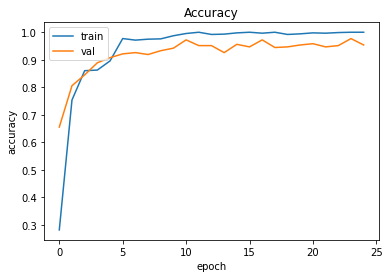

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

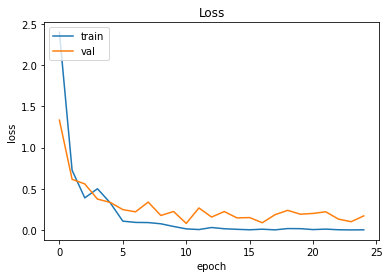

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model_simple.save_weights('model_inception_weights.h5')
model_simple.save('model_inception.h5')

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_simple)
tflite_model_simple = converter.convert()

with tf.io.gfile.GFile('model_simple.tflite', 'wb') as f:
  f.write(tflite_model_simple)

INFO:tensorflow:Assets written to: /tmp/tmpz2o1t5si/assets
